In [87]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
import os
os.chdir("drive/My Drive/Capstone Data")

FileNotFoundError: ignored

In [89]:
folder = os.path.join('/content/drive/My Drive/Capstone Data')

In [90]:
pwd()

'/content/drive/My Drive/Capstone Data'

In [91]:
!ls

'Capstone MSME EDA V1 (1).7_clean_NoNa_EDA.rmd'
'Capstone MSME EDA V1.3.rmd'
'Capstone MSME EDA V1.4.rmd'
'Capstone MSME EDA V1.5.ipynb'
'Capstone MSME EDA V1.5.rmd'
'Capstone MSME EDA V1.6 NA Imputation (1).rmd'
'Capstone MSME EDA V1.6 NA Imputation.rmd'
'Capstone MSME EDA V1.7_clean_imputed_knn.rmd'
'Capstone MSME EDA V1.7_clean_impute_knn'
'Capstone MSME EDA V1.7_clean_impute_knn.rmd'
'Capstone MSME EDA V1.7_clean_NoNa_EDA.rmd'
'Capstone MSME EDA V1.9 feature engineering.ipynb'
'Capstone MSME EDA V1.9 feature engineering v1.1.ipynb'
'Capstone MSME EDA V1.9 feature selection v1.1.ipynb'
'Capstone MSME pycaret modelling V1.1.ipynb'
'Capstone Project _ Interim Report V1.14.docx'
'Capstone Project _ Interim Report V1.14.pdf'
'Feature Engineering- Handling Categorical Feature- Day 4.ipynb'
 ltfs_data
'MSME data'
'MSME Data Modified_v1.1.xlsx'
'MSME Data Modified_v1.2.xlsx'
'MSME Data Modified_v1.3.xlsx'
'MSME Data Modified_v1.4.1.csv'
'MSME Data Modified_v1.4.2.csv'
'MSME Data Modified_v

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import pandas as pd
df=pd.read_csv("MSME Data Modified_v1.9_featureEngineered.csv")

In [3]:
df.head(5)

,sme_sector,bsr_activity_cd,bsr_org_cd,disbursed_amount,asset_cost,ltv,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,sector_name_Services,sme_category_MICRO,sme_category_SMALL,module_id_cdcc,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Not Scored,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Very Low Risk
0,2,55101,13,541190,839010,67.94,1,0,0,550000,...,1,1,0,1,1,0,0,0,0,1
1,2,60203,11,441220,641430,70.62,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,1,31901,11,310040,451380,73.11,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2,52101,12,473490,577260,84.88,1,0,60870,60870,...,1,1,0,0,1,0,0,1,0,0
4,2,55301,11,558090,696500,81.84,1,0,1733200,2500000,...,1,1,0,0,0,0,1,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 49 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   sme_sector                                               32191 non-null  int64  
 1   bsr_activity_cd                                          32191 non-null  int64  
 2   bsr_org_cd                                               32191 non-null  int64  
 3   disbursed_amount                                         32191 non-null  int64  
 4   asset_cost                                               32191 non-null  int64  
 5   ltv                                                      32191 non-null  float64
 6   PRI.ACTIVE.ACCTS                                         32191 non-null  int64  
 7   PRI.OVERDUE.ACCTS                                        32191 non-null  int64  
 8   PRI.CURRENT.BALANCE       

In [18]:
c = [21,29,20]
X = df.drop(df.columns[c], axis =1)
y = df['Delinquent'].astype(int)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
X.head()

,sme_sector,bsr_activity_cd,bsr_org_cd,disbursed_amount,asset_cost,ltv,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,sector_name_Services,sme_category_MICRO,sme_category_SMALL,module_id_cdcc,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Not Scored,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Very Low Risk
0,2,55101,13,541190,839010,67.94,1,0,0,550000,...,1,1,0,1,1,0,0,0,0,1
1,2,60203,11,441220,641430,70.62,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,1,31901,11,310040,451380,73.11,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2,52101,12,473490,577260,84.88,1,0,60870,60870,...,1,1,0,0,1,0,0,1,0,0
4,2,55301,11,558090,696500,81.84,1,0,1733200,2500000,...,1,1,0,0,0,0,1,0,0,0


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Delinquent, dtype: int64

In [21]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [22]:
model.fit(X_train,y_train)

D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(random_state=0, solver='liblinear')

In [25]:
model.classes_

array([0, 1])

In [26]:
model.intercept_

array([-5.93620407e-07])

In [8]:
model.coef_

array([[-8.08369550e-07, -5.32357380e-06, -1.00441653e-05,
        -3.35511957e-07, -1.47590210e-06, -5.38818172e-05,
         2.52317405e-05,  1.12697750e-05, -4.24684937e-08,
         2.38443849e-08,  4.62710635e-08,  2.68552361e-06,
         1.43231936e-06,  7.05489569e-07, -4.58203346e-09,
         6.26149308e-07, -5.62719960e-07,  7.05529150e-08,
         6.04521064e-09,  5.97939928e-06,  1.92846618e-05,
        -7.80630836e-07, -4.10084926e-07, -2.22051838e-07,
        -4.60176926e-07, -1.77433174e-08,  3.41104819e-08,
         1.44958790e-03, -1.13283622e-06, -4.30265345e-07,
        -1.03209802e-05, -4.31960480e-07, -2.08553588e-06,
        -7.57261357e-05, -3.97686364e-04, -8.16964850e-06,
        -2.01271117e-04, -2.77387133e-08, -5.54958655e-07,
        -2.18110222e-07, -4.03120640e-07, -3.29542893e-07,
         1.12361939e-06,  1.89652851e-06, -6.06985385e-06,
         1.83783324e-06, -3.97715965e-06]])

In [9]:
model.predict_proba(X_train)

array([[0.95390327, 0.04609673],
       [0.93767327, 0.06232673],
       [0.85428889, 0.14571111],
       ...,
       [0.95485603, 0.04514397],
       [0.96071826, 0.03928174],
       [0.97516012, 0.02483988]])

In [10]:
pred =model.predict(X_train).reshape(-1,1)

In [11]:
 model.score(X, y)

0.9179584355875866

In [38]:
pred.shape

(25752, 1)

In [23]:
confusion_matrix(y_train, pred)

array([[23596,    81],
       [ 2019,    56]], dtype=int64)

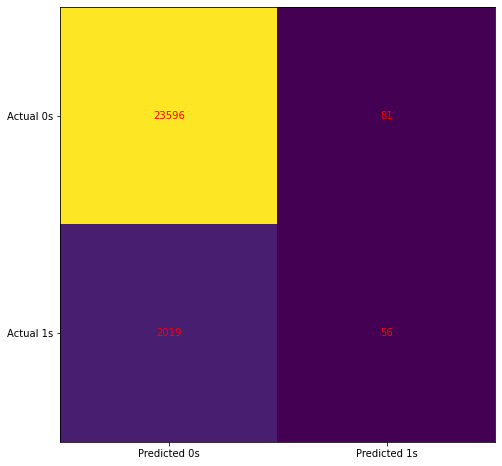

In [24]:
cm = confusion_matrix(y_train, pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [25]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     23677
           1       0.41      0.03      0.05      2075

    accuracy                           0.92     25752
   macro avg       0.66      0.51      0.50     25752
weighted avg       0.88      0.92      0.88     25752



AUC: 0.7588768759343537


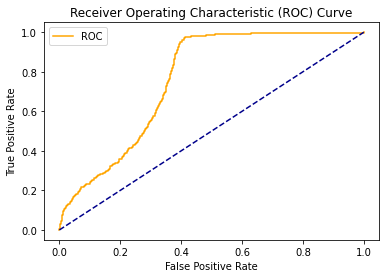

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )
    
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,model)

In [42]:
#Improve the Model
#You can improve your model by setting different parameters. For example, let’s work with the regularization strength 
#C equal to 10.0, instead of the default value of 1.0:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
model.intercept_

array([-4.38904673e-07])

In [44]:
model.coef_

array([[-4.53395350e-07, -5.18810760e-06, -5.65210969e-06,
        -2.62622006e-07, -1.48318272e-06, -3.03080065e-05,
         1.47109940e-05,  6.34520295e-06, -4.55076770e-08,
         4.98745397e-08,  2.47502318e-08,  1.53846667e-06,
         8.19333740e-07,  4.00230308e-07, -7.57651805e-09,
         6.32734209e-07, -5.65793511e-07,  7.51433590e-08,
         9.35163769e-09,  3.56346589e-06,  1.09070933e-05,
        -4.38904673e-07, -2.17247901e-07, -1.22622548e-07,
        -2.71838262e-07, -1.01351563e-08,  1.94101684e-08,
         1.05511067e-03,  3.44131558e-07, -2.43026511e-07,
        -1.01728814e-05, -2.84869299e-07, -1.84151983e-06,
        -4.74503876e-05, -2.61032383e-04, -1.39760579e-05,
        -1.94745464e-04, -1.44906771e-08, -3.15007931e-07,
        -1.19877943e-07, -2.24077101e-07, -1.87948126e-07,
         6.92762197e-07,  1.09826758e-06, -3.73906354e-06,
         1.02413469e-06, -2.00862638e-06]])

In [45]:
model.predict_proba(X_train)

array([[0.94971828, 0.05028172],
       [0.93242924, 0.06757076],
       [0.84414602, 0.15585398],
       ...,
       [0.94899606, 0.05100394],
       [0.95111375, 0.04888625],
       [0.97149556, 0.02850444]])

In [46]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
model.score(X_train, y_train)

0.9184141037589314

In [49]:
confusion_matrix(y_train, model.predict(X_train))

array([[23594,    83],
       [ 2018,    57]])

In [50]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     23677
           1       0.41      0.03      0.05      2075

    accuracy                           0.92     25752
   macro avg       0.66      0.51      0.50     25752
weighted avg       0.88      0.92      0.88     25752



In [52]:
y_train.value_counts()

0    23677
1     2075
Name: Delinquent, dtype: int64

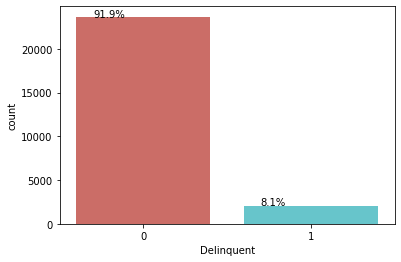

In [60]:
import seaborn as sns
ax = sns.countplot(x =y_train.index,data=y_train,palette='hls')
#for p in ax.patches:
#        ax.annotate('%{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/len(y_train)), (p.get_x()+0.1, p.get_height()+5))
plt.show()

In [64]:
type(X_train)

pandas.core.frame.DataFrame

In [27]:
# Normalize the data
from sklearn import preprocessing

X_values = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_values)
X = pd.DataFrame(x_scaled)

In [28]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1.0,0.546017,0.500000,0.041091,0.029461,0.646313,0.019231,0.0,0.021869,0.000939,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.597606,0.416667,0.030855,0.017050,0.681355,0.000000,0.0,0.021869,0.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.311432,0.416667,0.017422,0.005112,0.713912,0.000000,0.0,0.021869,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.515683,0.458333,0.034159,0.013019,0.867809,0.019231,0.0,0.021990,0.000104,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.548039,0.416667,0.042822,0.020509,0.828060,0.019231,0.0,0.025290,0.004270,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [31]:
model.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [75]:
model.coef_
model.intercept_

array([-1.56954014])

In [76]:
model.predict_proba(X_train)

array([[0.99613056, 0.00386944],
       [0.99644548, 0.00355452],
       [0.99580329, 0.00419671],
       ...,
       [0.99489091, 0.00510909],
       [0.99600055, 0.00399945],
       [0.99505025, 0.00494975]])

In [32]:
pred = model.predict(X_train)

In [33]:
confusion_matrix(y_train, model.predict(X_train))

array([[23460,   217],
       [ 1663,   412]], dtype=int64)

In [34]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     23677
           1       0.66      0.20      0.30      2075

    accuracy                           0.93     25752
   macro avg       0.79      0.59      0.63     25752
weighted avg       0.91      0.93      0.91     25752



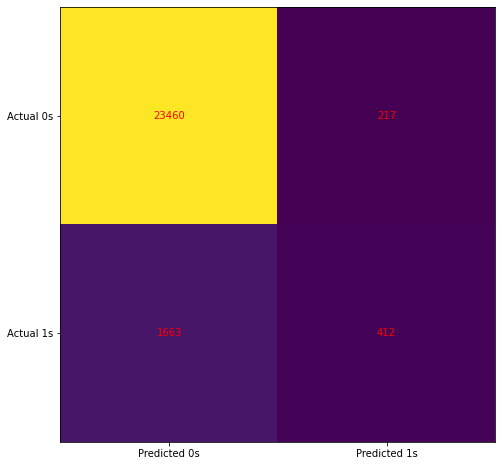

In [35]:
cm = confusion_matrix(y_train, pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

AUC: 0.9229110981359623


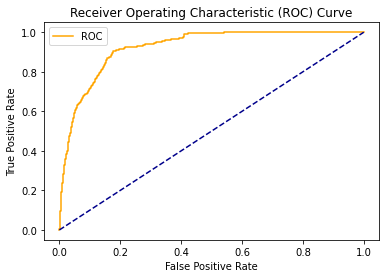

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )
    
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,model)

In [ ]:
# Accuracy Increased after normalizing the data
# F1 score also increased
# But this is on training data
# Let's check on test data

In [37]:
pred = model.predict(X_test)
confusion_matrix(y_test, pred)

array([[5852,   54],
       [ 413,  120]], dtype=int64)

In [38]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5906
           1       0.69      0.23      0.34       533

    accuracy                           0.93      6439
   macro avg       0.81      0.61      0.65      6439
weighted avg       0.91      0.93      0.91      6439



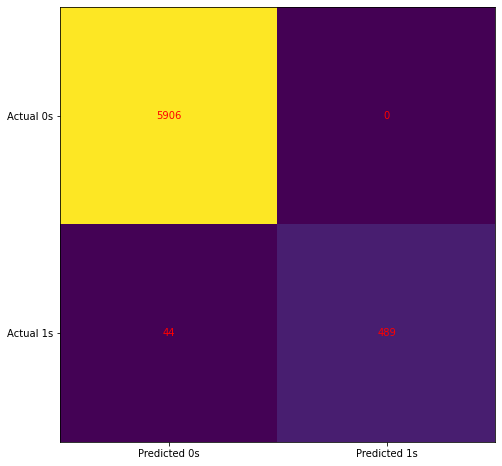

In [83]:
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

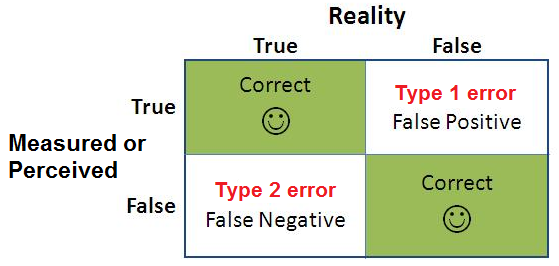

In [97]:
# Good thing about this model is that it is not predicting non delinquent customers as delinquent. i.e. false positive is 0
from IPython.display import Image
Image('type-1-2-errors.png')

In [98]:
# Check For multicollinearity

In [99]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [100]:
c = [21,29]
X = df.drop(df.columns[c], axis =1)
y = df['Delinquent'].astype(int)

In [104]:
vif_df = calc_vif(X)

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [102]:
### VIF starts at 1 and has no upper limit
### VIF = 1, no correlation between the independent variable and the other variables
### VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [105]:
vif_df

,variables,VIF
0,sme_sector,inf
1,bsr_activity_cd,1.758898
2,bsr_org_cd,1.110446
3,disbursed_amount,36.036852
4,asset_cost,33.723685
5,ltv,15.199669
6,PRI.ACTIVE.ACCTS,3.761274
7,PRI.OVERDUE.ACCTS,2.362154
8,PRI.CURRENT.BALANCE,15.944042
9,PRI.SANCTIONED.AMOUNT,2164.906611


In [126]:
vif_df = vif_df.sort_values('VIF', ascending=False)
vif_df

,variables,VIF
0,sme_sector,inf
37,sector_name_Services,inf
9,PRI.SANCTIONED.AMOUNT,2164.906611
10,PRI.DISBURSED.AMOUNT,2163.117365
15,SEC.SANCTIONED.AMOUNT,802.249584
16,SEC.DISBURSED.AMOUNT,801.121742
27,PERFORM_CNS.SCORE,173.101181
44,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Not S...,94.657130
3,disbursed_amount,36.036852
4,asset_cost,33.723685


If there is perfect correlation, then VIF = infinity. A large value of VIF indicates that there is a correlation between the variables

Text(0, 0.5, 'VIF')

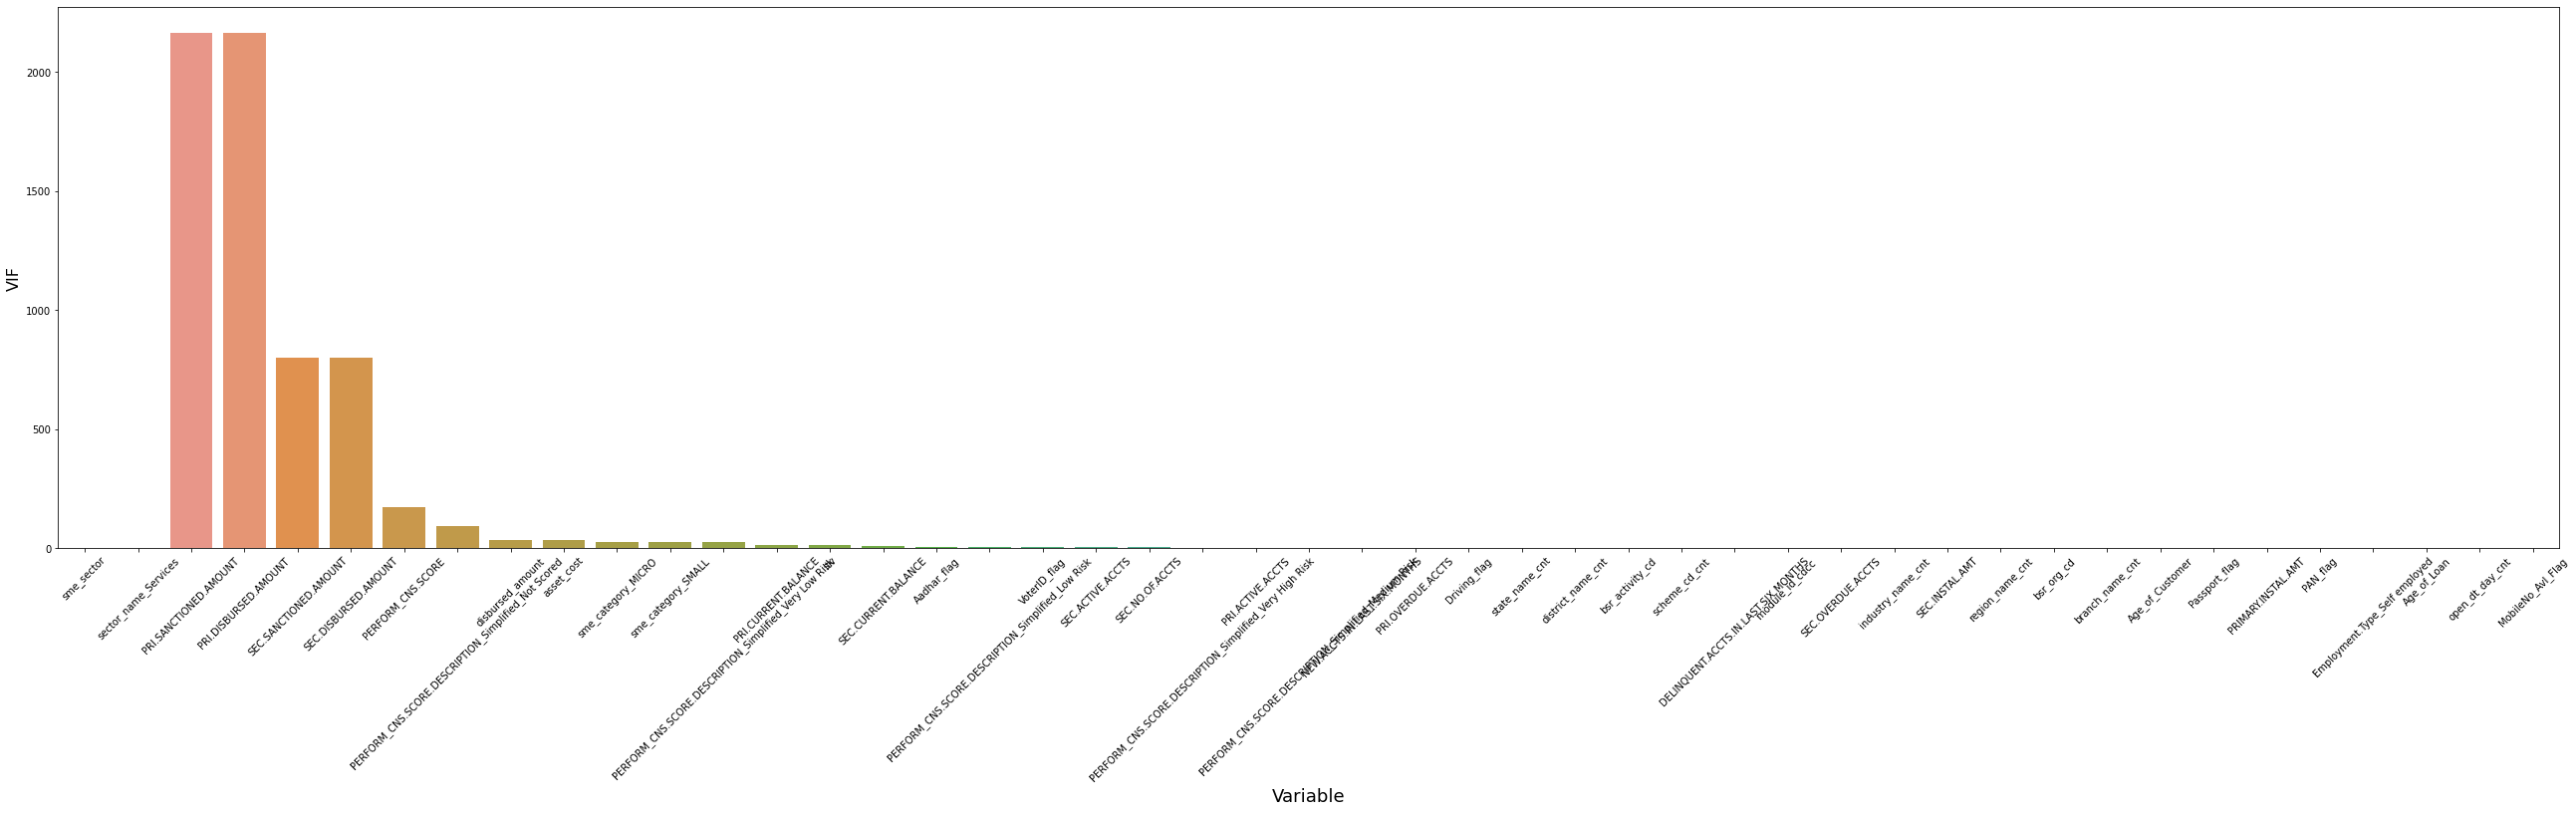

In [125]:
plt.figure(figsize=(45,10))
g= sns.barplot(x='variables', y="VIF", data=vif_df  )
plt.xticks(rotation=45)
plt.xlabel('Variable', fontsize=18)
plt.ylabel('VIF', fontsize=16)
#fig.savefig('test.jpg')

In [68]:
# removing the columns with high multicolinearity
c =[0,9,15,20,44,46,21]  # some variable not removed as they are important with respect to business perspective
X = df.drop(df.columns[c], axis=1)

Now only 44 independent varaibles left

In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 42 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   bsr_activity_cd                                          32191 non-null  int64  
 1   bsr_org_cd                                               32191 non-null  int64  
 2   disbursed_amount                                         32191 non-null  int64  
 3   asset_cost                                               32191 non-null  int64  
 4   ltv                                                      32191 non-null  float64
 5   PRI.ACTIVE.ACCTS                                         32191 non-null  int64  
 6   PRI.OVERDUE.ACCTS                                        32191 non-null  int64  
 7   PRI.CURRENT.BALANCE                                      32191 non-null  int64  
 8   PRI.DISBURSED.AMOUNT      

In [70]:
X.shape

(32191, 42)

Dividing the new data with multicolinear varaibles removed and building the Logistic regressio model

---



In [71]:
# Normalize the data
from sklearn import preprocessing

X_values = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_values)
X = pd.DataFrame(x_scaled)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train,y_train)
pred = model.predict(X_train)
confusion_matrix(y_train, model.predict(X_train))

array([[23520,   157],
       [ 1841,   234]], dtype=int64)

In [73]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     23677
           1       0.60      0.11      0.19      2075

    accuracy                           0.92     25752
   macro avg       0.76      0.55      0.57     25752
weighted avg       0.90      0.92      0.90     25752



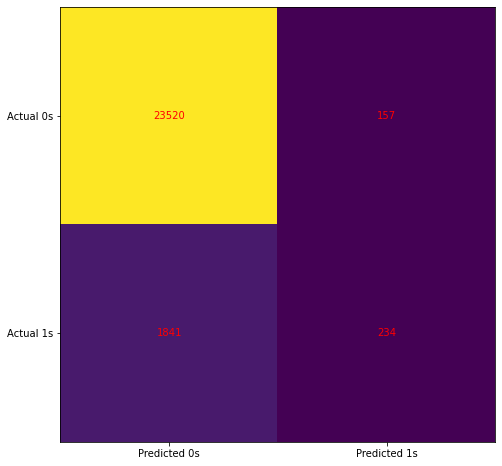

In [74]:
cm = confusion_matrix(y_train, pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Test Prediction

---



In [75]:
pred = model.predict(X_test)
confusion_matrix(y_test, model.predict(X_test))

array([[5863,   43],
       [ 480,   53]], dtype=int64)

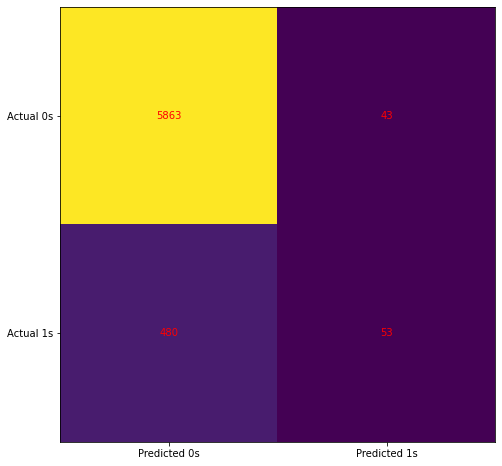

In [76]:
cm = confusion_matrix(y_test, pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [77]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5906
           1       0.55      0.10      0.17       533

    accuracy                           0.92      6439
   macro avg       0.74      0.55      0.56      6439
weighted avg       0.89      0.92      0.89      6439



AUC: 0.9104859814390428


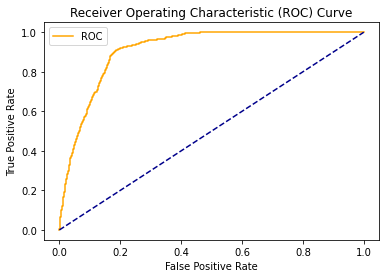

In [78]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )
    
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,model)

In [45]:
model.coef_

array([[-4.79935475e-01, -1.13458618e+00, -7.51222509e-02,
        -7.31415452e-02, -1.16505190e+00,  3.94122843e-01,
         3.40319881e-01,  5.69796537e-02,  1.28662344e-01,
         8.41599973e-02,  7.80016386e-02,  1.30042381e-01,
        -9.72988202e-02,  4.82143869e-02,  2.56883259e-02,
         3.59554086e-03,  2.26555097e-01,  1.22244924e+01,
         0.00000000e+00, -1.01680940e+00, -1.64405811e-01,
        -8.61593534e-01, -4.26779082e-01, -3.62743462e-02,
         1.21711640e+00,  4.35923429e-02, -1.08905773e-01,
        -2.23990477e-01, -3.62505745e-01, -3.93346372e-02,
        -1.16024669e-01, -1.50692860e-01, -3.64957018e-01,
        -1.53602847e-01, -4.87647103e-01, -1.87630141e-01,
        -1.36131308e+00, -1.05711022e+00, -3.26844800e-01,
        -2.05346280e-01,  2.37433992e-01,  5.20866406e-01,
        -8.78806533e-01]])

In [51]:
coeficient = pd.DataFrame(model.coef_)

In [53]:
coeficient.T

,0
0,-0.479935
1,-1.134586
2,-0.075122
3,-0.073142
4,-1.165052
5,0.394123
6,0.340320
7,0.056980
8,0.128662
9,0.084160


In [58]:
X.columns

RangeIndex(start=0, stop=43, step=1)

In [80]:
# removing the columns with high multicolinearity
c =[0,9,15,20,44,46]  # some variable not removed as they are important with respect to business perspective
X = df.drop(df.columns[c], axis=1)
coeficient = pd.DataFrame(model.coef_)
model_coeficient = pd.DataFrame()
model_coeficient['Variables']= X.columns

model_coeficient['Model Coef Value'] = coeficient.T
model_coeficient = model_coeficient.sort_values('Model Coef Value', ascending=False)
model_coeficient

,Variables,Model Coef Value
6,PRI.OVERDUE.ACCTS,13.222337
5,PRI.ACTIVE.ACCTS,6.542507
11,SEC.OVERDUE.ACCTS,4.404274
23,Passport_flag,3.917191
8,PRI.DISBURSED.AMOUNT,1.842276
10,SEC.ACTIVE.ACCTS,1.804561
9,SEC.NO.OF.ACCTS,1.697777
7,PRI.CURRENT.BALANCE,1.503583
13,SEC.DISBURSED.AMOUNT,0.827287
40,PERFORM_CNS.SCORE.DESCRIPTION_Simplified_Mediu...,0.649112


In [62]:
model_coeficient.head()

,Variables,Model Coef Value
0,bsr_activity_cd,-0.479935
1,bsr_org_cd,-1.134586
2,disbursed_amount,-0.075122
3,asset_cost,-0.073142
4,ltv,-1.165052


In [ ]:
plt.figure(figsize=(45,10))
g= sns.barplot(x='variables', y="VIF", data=vif_df  )
plt.xticks(rotation=45)
plt.xlabel('Variable', fontsize=18)
plt.ylabel('VIF', fontsize=16)

#### Random Forest

RF train roc-auc: 1.0
RF test roc-auc: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23677
           1       1.00      1.00      1.00      2075

    accuracy                           1.00     25752
   macro avg       1.00      1.00      1.00     25752
weighted avg       1.00      1.00      1.00     25752

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5906
           1       1.00      1.00      1.00       533

    accuracy                           1.00      6439
   macro avg       1.00      1.00      1.00      6439
weighted avg       1.00      1.00      1.00      6439



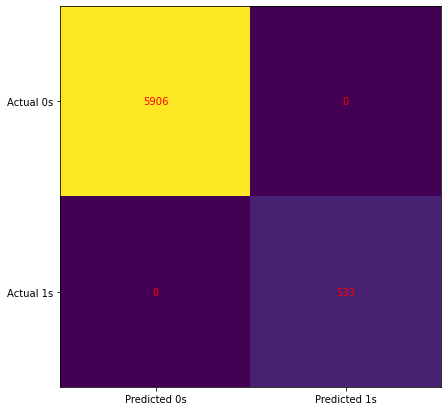

AUC: 1.0


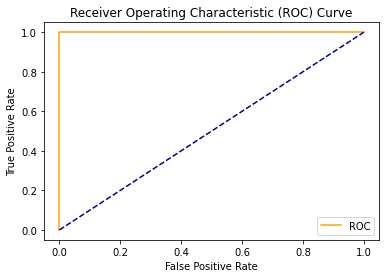

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test   = train_test_split(X, y, test_size=0.2, random_state=1)

## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

from sklearn.metrics import classification_report
# Train Prediction classification report
print(classification_report(y_train, rf_model.predict(X_train)))

# Test Prediction classification report
print(classification_report(y_test, rf_model.predict(X_test)))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_model.predict(X_test))
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )
    
fpr, tpr, thresholds = roc_curve(y_test,rf_model.predict_proba(X_test)[:,1] )
plot_roc_curve(fpr,tpr,rf_model)